In [1]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report 
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest,chi2

%matplotlib inline

In [2]:
# Reading the train.csv by removing the
# last column since it's an empty column
training_data = pd.read_csv("backend/data/symptoms_Data_Training.csv")

In [3]:
print(training_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB
None


In [4]:
training_data.head(1)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [5]:
training_data.drop(training_data.columns[-1], axis=1,inplace=True)
training_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [6]:
print(training_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB
None


In [7]:
def data_processing(data):
    # List of target labels
    target_labels = ["Diabetes", "Hypertension","Bronchial Asthma","Allergy","Common Cold"]

    # 1. Change all rows not in target labels to "not ill"
    data["prognosis"] = data["prognosis"].apply(
        lambda x: x if x in target_labels else "not ill"
    )
    return data

In [8]:
data = data_processing(training_data)

In [9]:
# Data types and non-null counts
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB
None


In [10]:
# Summary for binary columns
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# Check for missing values in each column
data.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [12]:
for col in data.columns[:-1]:  # Exclude the last object column
    print(f"{col}:\n{data[col].value_counts()}\n")

itching:
itching
0    4242
1     678
Name: count, dtype: int64

skin_rash:
skin_rash
0    4134
1     786
Name: count, dtype: int64

nodal_skin_eruptions:
nodal_skin_eruptions
0    4812
1     108
Name: count, dtype: int64

continuous_sneezing:
continuous_sneezing
0    4698
1     222
Name: count, dtype: int64

shivering:
shivering
0    4812
1     108
Name: count, dtype: int64

chills:
chills
0    4122
1     798
Name: count, dtype: int64

joint_pain:
joint_pain
0    4236
1     684
Name: count, dtype: int64

stomach_pain:
stomach_pain
0    4698
1     222
Name: count, dtype: int64

acidity:
acidity
0    4698
1     222
Name: count, dtype: int64

ulcers_on_tongue:
ulcers_on_tongue
0    4812
1     108
Name: count, dtype: int64

muscle_wasting:
muscle_wasting
0    4812
1     108
Name: count, dtype: int64

vomiting:
vomiting
0    3006
1    1914
Name: count, dtype: int64

burning_micturition:
burning_micturition
0    4704
1     216
Name: count, dtype: int64

spotting_urination:
spotting_urination

In [13]:
print(data.columns.tolist())

['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bowe

In [14]:
# Encoding the target value into numerical value using LabelEncoder
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

In [15]:
XX = data.iloc[:, :-1]
y = data.iloc[:, -1]

C:\Users\Msys\AppData\Local\Temp\ipykernel_3960\3930870624.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Disease", y="Counts",data = temp_df, palette='viridis')


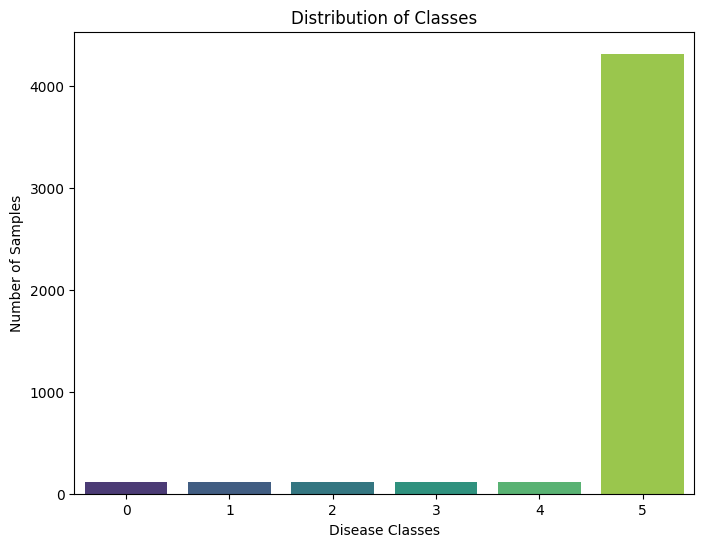

In [16]:
# Checking whether the dataset is balanced or not
disease_counts = y.value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

plt.figure(figsize=(8, 6))
sns.barplot(x="Disease", y="Counts",data = temp_df, palette='viridis')
plt.title("Distribution of Classes")
plt.xlabel("Disease Classes")
plt.ylabel("Number of Samples")
plt.show()


In [17]:
sm = SMOTE(random_state=4)

XX, y = sm.fit_resample(XX, y)

print("After OverSampling, the shape of train_X: {}".format(XX.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y.shape))


After OverSampling, the shape of train_X: (25920, 132)
After OverSampling, the shape of train_y: (25920,) 



C:\Users\Msys\AppData\Local\Temp\ipykernel_3960\3930870624.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Disease", y="Counts",data = temp_df, palette='viridis')


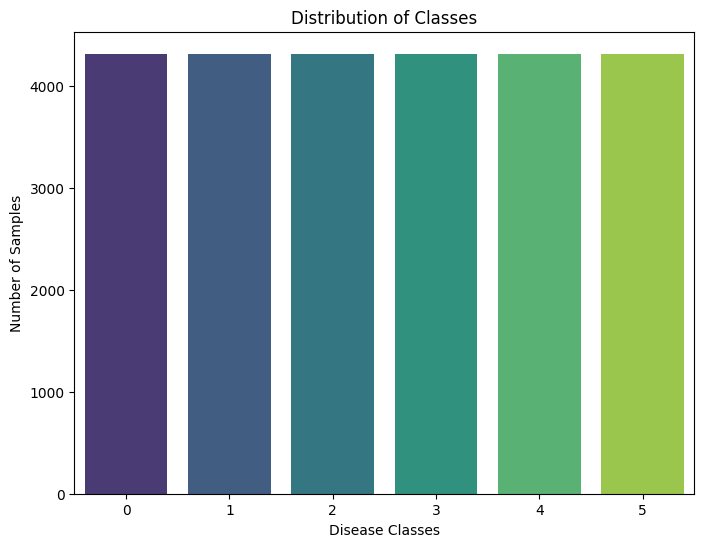

In [18]:
# Checking whether the dataset is balanced or not
disease_counts = y.value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

plt.figure(figsize=(8, 6))
sns.barplot(x="Disease", y="Counts",data = temp_df, palette='viridis')
plt.title("Distribution of Classes")
plt.xlabel("Disease Classes")
plt.ylabel("Number of Samples")
plt.show()


In [19]:
# Assume X is your feature matrix and y is your target variable
selector = SelectKBest(score_func=chi2, k=16)  # Select top 10 features
X = selector.fit_transform(XX, y)

# Get scores and feature indices
scores = selector.scores_
selected_features = selector.get_support(indices=True)
print("Selected feature indices:", selected_features)
# print("Feature scores:", scores)
selected_columns = XX.columns[selector.get_support()].tolist()
print("Selected columns:", selected_columns)


Selected feature indices: [  4  20  23  50  51  52  53  54  55  67  88 104 105 106 107 109]
Selected columns: ['shivering', 'restlessness', 'irregular_sugar_level', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'obesity', 'loss_of_smell', 'increased_appetite', 'polyuria', 'family_history', 'mucoid_sputum', 'lack_of_concentration']


In [20]:
X_train, X_test, y_train, y_test =train_test_split(
  X, y, test_size = 0.3, random_state = 42)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")


Train: (18144, 16), (18144,)
Test: (7776, 16), (7776,)


In [ ]:
param_grid_RF = {
    "n_estimators": [25, 50, 100, 150],
    "max_features": ["sqrt", "log2", None],
    "max_depth": [3, 6, 9],
    "max_leaf_nodes": [3, 6, 9],
}

grid_search_RF = GridSearchCV(RandomForestClassifier(), param_grid=param_grid_RF)
grid_search_RF.fit(X_train, y_train)

print("best accuracy", grid_search_RF.best_score_)
print(grid_search_RF.best_estimator_)



In [ ]:

# Hyperparameter to fine tune for DecisionTreeClassifier
param_grid_DT = {
    "max_depth": range(1, 10, 1),
    "min_samples_leaf": range(1, 20, 2),
    "min_samples_split": range(2, 20, 2),
    "criterion": ["entropy", "gini"],
}

# Decision tree classifier
tree = DecisionTreeClassifier(random_state=1)
# GridSearchCV
grid_search_DT = GridSearchCV(
    estimator=tree, param_grid=param_grid_DT, cv=5, verbose=True
)
grid_search_DT.fit(X_train, y_train)

# Best score and estimator
print("best accuracy", grid_search_DT.best_score_)
print(grid_search_DT.best_estimator_)

# criterion='entropy', max_depth=2, random_state=1

In [ ]:
# Hyperparameter to fine tune for SVM
param_grid_SVM = {
    "C": [0.1, 1, 10, 100, 1000],
    "gamma": [1, 0.1, 0.01, 0.001, 0.0001],
    "kernel": ["rbf"],
}

grid_search_SVM = GridSearchCV(SVC(), param_grid_SVM, refit=True, verbose=3)

# fitting the model for grid search
grid_search_SVM.fit(X_train, y_train)

# Best score and estimator
print("best accuracy", grid_search_SVM.best_score_)
print(grid_search_SVM.best_estimator_)

# C=0.1, gamma=0.001

In [21]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))


# Initializing Models
models = {
    "SVC": SVC(C=0.1, gamma=1),
    "Gaussian NB": GaussianNB(),
    "Random Forest": RandomForestClassifier(
        random_state=18, max_depth=3, max_leaf_nodes=6
    ),
    "Decision Tree": DecisionTreeClassifier(
        criterion="entropy", max_depth=6, random_state=1
    ),
}

# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv=10, n_jobs=-1, scoring=cv_scoring)
    print("==" * 30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [0.97453704 0.96990741 0.97415123 0.97337963 0.97029321 0.96990741
 0.96682099 0.97376543 0.97376543 0.96682099]
Mean Score: 0.9713348765432099
Gaussian NB
Scores: [0.84143519 0.83950617 0.8429784  0.85532407 0.83912037 0.84259259
 0.84027778 0.84259259 0.8441358  0.84182099]
Mean Score: 0.8429783950617284
Random Forest
Scores: [0.97453704 0.96990741 0.97415123 0.97337963 0.97029321 0.96990741
 0.96682099 0.97376543 0.97376543 0.96682099]
Mean Score: 0.9713348765432099
Decision Tree
Scores: [0.97453704 0.96990741 0.97415123 0.97337963 0.97029321 0.96990741
 0.96682099 0.97376543 0.97376543 0.96682099]
Mean Score: 0.9713348765432099


Accuracy on train data by SVM Classifier: 97.13955026455027     precision on train data by SVM Classifier: 97.41232667472562     recall score on train data by SVM Classifier: 97.13955026455027      f1 score on train data by SVM Classifier: 97.17191578002429
                  precision    recall  f1-score   support

        Diabetes       1.00      0.90      0.95      3025
    Hypertension       0.97      1.00      0.99      2994
Bronchial Asthma       1.00      1.00      1.00      3052
         Allergy       1.00      1.00      1.00      3034
     Common Cold       1.00      0.95      0.97      3012
         Not Ill       0.87      0.97      0.92      3027

        accuracy                           0.97     18144
       macro avg       0.97      0.97      0.97     18144
    weighted avg       0.97      0.97      0.97     18144



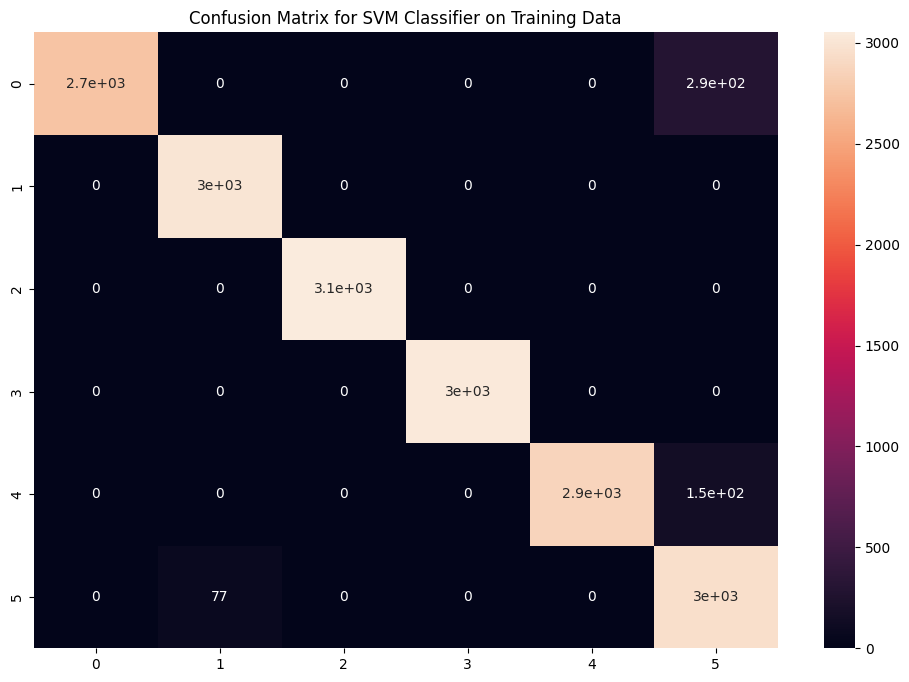

Accuracy on test data by SVM Classifier: 97.11934156378601     precision_score on test data by SVM Classifier: 97.38224114574281     recall_score on test data by SVM Classifier: 97.11934156378601     f1_score on test data by SVM Classifier: 97.1518277238857

                  precision    recall  f1-score   support

        Diabetes       1.00      0.91      0.95      1295
    Hypertension       0.97      1.00      0.99      1326
Bronchial Asthma       1.00      1.00      1.00      1268
         Allergy       1.00      1.00      1.00      1286
     Common Cold       1.00      0.95      0.97      1308
         Not Ill       0.87      0.97      0.92      1293

        accuracy                           0.97      7776
       macro avg       0.97      0.97      0.97      7776
    weighted avg       0.97      0.97      0.97      7776



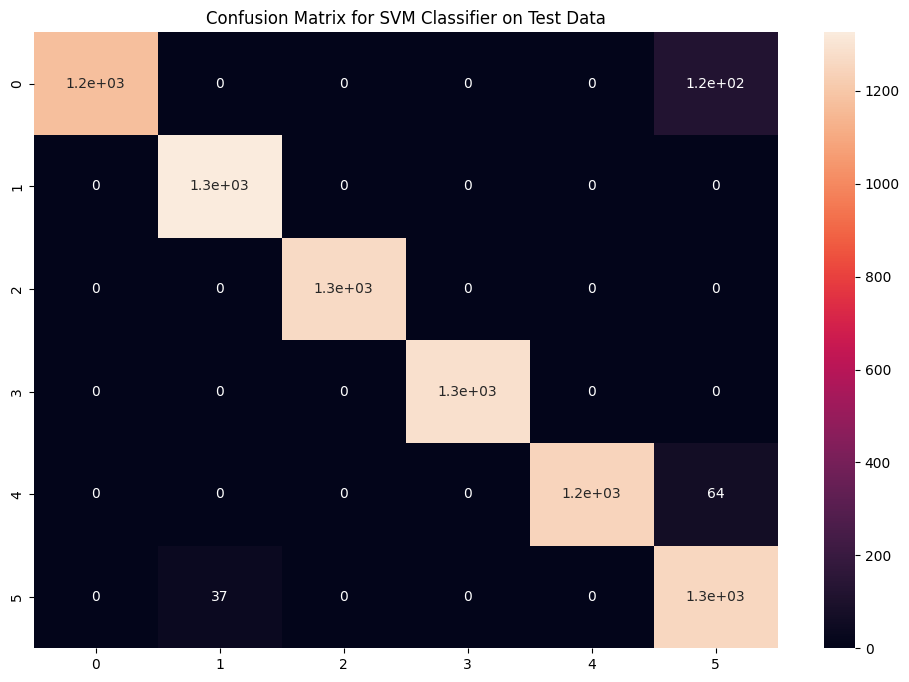

Accuracy on train data by GaussianNB Classifier: 84.25374779541445     precision_score on train data by GaussianNB Classifier: 91.6019934825346     recall_score on train data by GaussianNB Classifier: 84.25374779541445     f1_score on train data by GaussianNB Classifier: 80.61223489281697
Accuracy on test data by Naive Bayes Classifier: 84.40072016460906     precision_score on test data by Naive Bayes Classifier: 91.61120269548655     recall_score on test data by Naive Bayes Classifier: 84.40072016460906     f1_score on test data by Naive Bayes Classifier: 80.84754765173035

Accuracy on train data by Random Forest Classifier: 97.13955026455027     precision_score on train data by Random Forest Classifier: 97.41232667472562     recall_score on train data by Random Forest Classifier: 97.13955026455027     f1_score on train data by Random Forest Classifier: 97.17191578002429
                  precision    recall  f1-score   support

        Diabetes       1.00      0.90      0.95      302

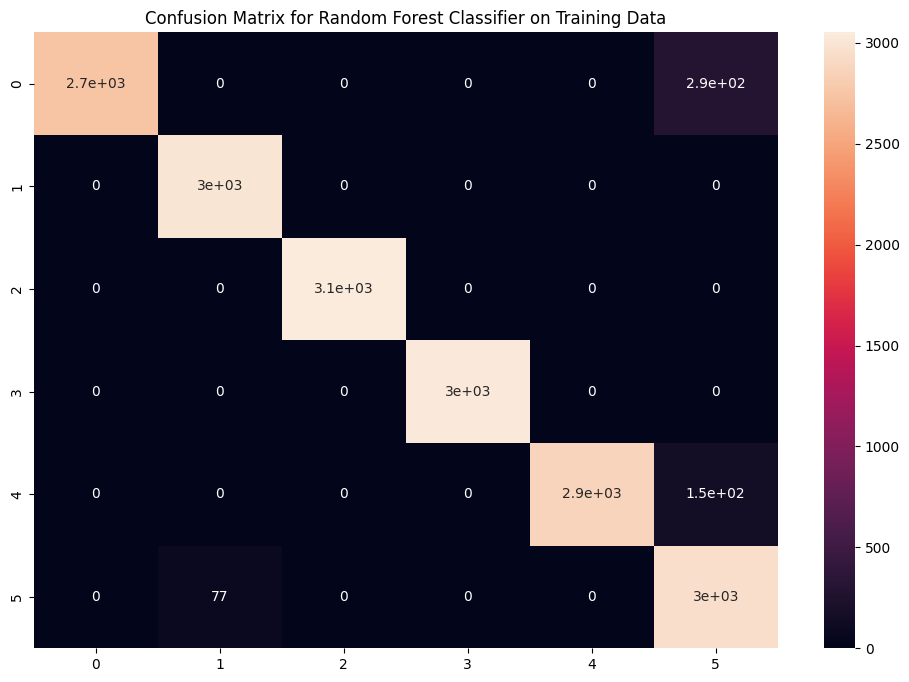

Accuracy on test data by Random Forest Classifier: 97.11934156378601     precision_score on test data by Random Forest Classifier: 97.38224114574281     recall_score on test data by Random Forest Classifier: 97.11934156378601     f1_score on test data by Random Forest Classifier: 97.1518277238857

                  precision    recall  f1-score   support

        Diabetes       1.00      0.91      0.95      1295
    Hypertension       0.97      1.00      0.99      1326
Bronchial Asthma       1.00      1.00      1.00      1268
         Allergy       1.00      1.00      1.00      1286
     Common Cold       1.00      0.95      0.97      1308
         Not Ill       0.87      0.97      0.92      1293

        accuracy                           0.97      7776
       macro avg       0.97      0.97      0.97      7776
    weighted avg       0.97      0.97      0.97      7776



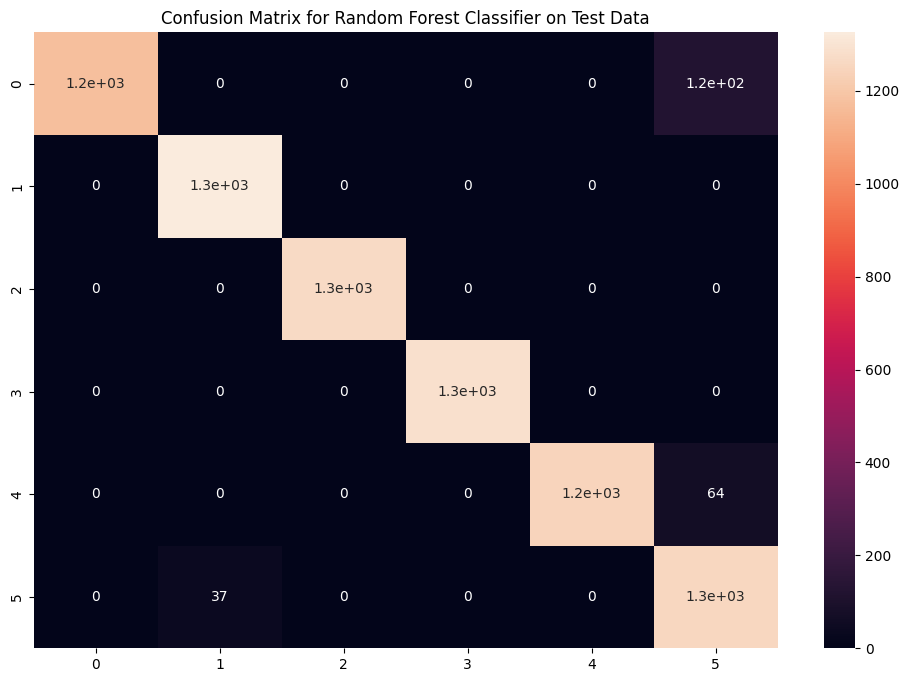

Accuracy on train data by Decision Tree Classifier: 97.13955026455027     precision_score on train data Decision Tree Forest Classifier: 97.41232667472562     recall_score on train data by Decision Tree Classifier: 97.13955026455027     f1_score on train data by Decision Tree Classifier: 97.17191578002429
                  precision    recall  f1-score   support

        Diabetes       1.00      0.90      0.95      3025
    Hypertension       0.97      1.00      0.99      2994
Bronchial Asthma       1.00      1.00      1.00      3052
         Allergy       1.00      1.00      1.00      3034
     Common Cold       1.00      0.95      0.97      3012
         Not Ill       0.87      0.97      0.92      3027

        accuracy                           0.97     18144
       macro avg       0.97      0.97      0.97     18144
    weighted avg       0.97      0.97      0.97     18144



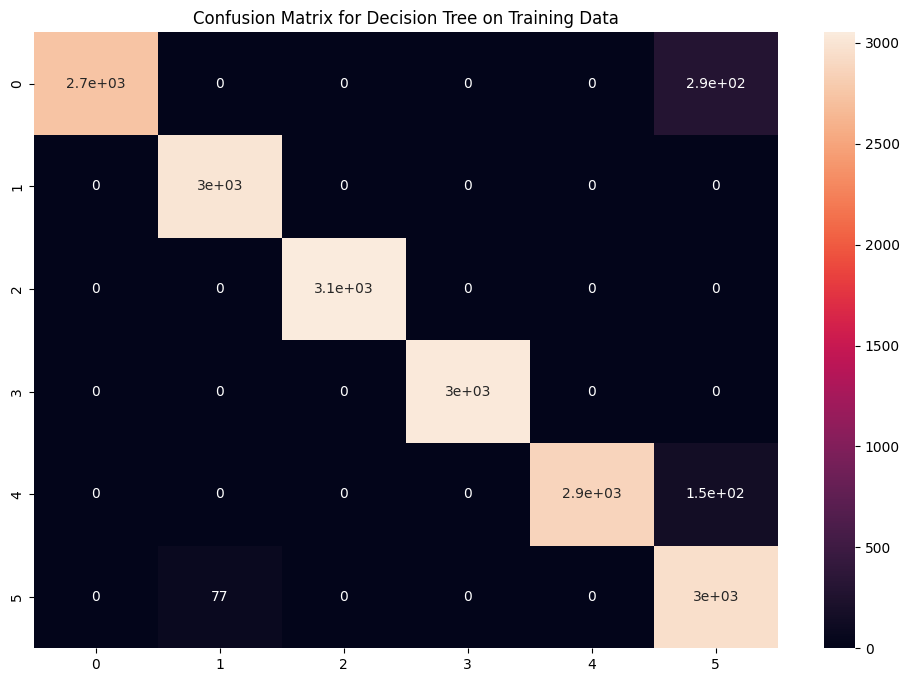

Accuracy on test data by Decision Tree Classifier: 97.11934156378601     precision_score on test data by Decision Tree Classifier: 97.38224114574281     recall_score on test data by Decision Tree Classifier: 97.11934156378601     f1_score on test data by Decision Tree Classifier: 97.1518277238857

                  precision    recall  f1-score   support

        Diabetes       1.00      0.91      0.95      1295
    Hypertension       0.97      1.00      0.99      1326
Bronchial Asthma       1.00      1.00      1.00      1268
         Allergy       1.00      1.00      1.00      1286
     Common Cold       1.00      0.95      0.97      1308
         Not Ill       0.87      0.97      0.92      1293

        accuracy                           0.97      7776
       macro avg       0.97      0.97      0.97      7776
    weighted avg       0.97      0.97      0.97      7776



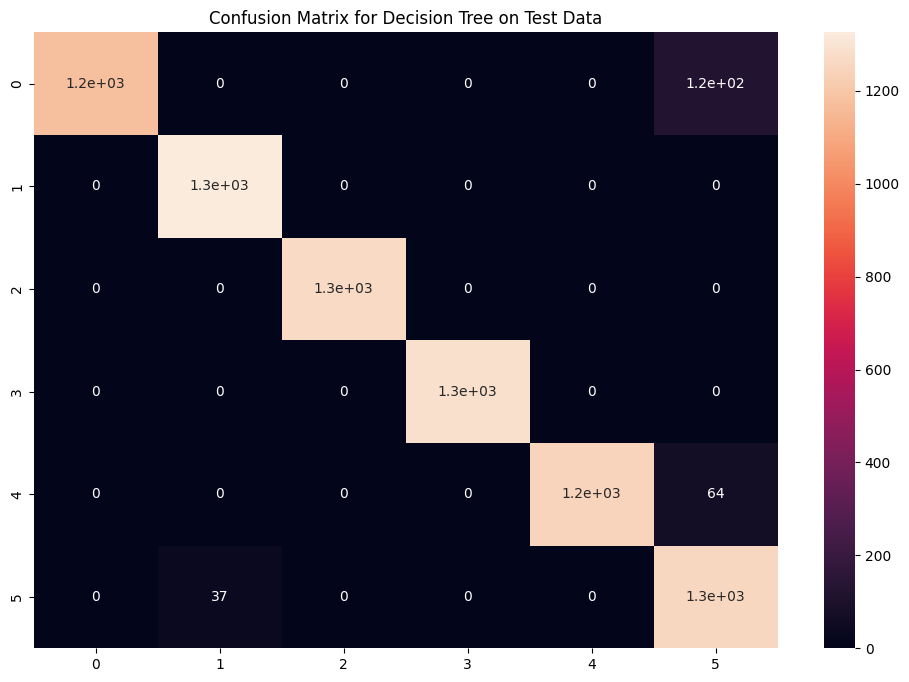

In [22]:
# Training and testing SVM Classifier
svm_model = SVC(C=0.1, gamma=1)
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)


print(
    f"Accuracy on train data by SVM Classifier: {accuracy_score(y_train, svm_model.predict(X_train))*100}\
     precision on train data by SVM Classifier: {precision_score(y_train, svm_model.predict(X_train),average="weighted")*100}\
     recall score on train data by SVM Classifier: {recall_score(y_train, svm_model.predict(X_train),average="weighted")*100} \
     f1 score on train data by SVM Classifier: {f1_score(y_train, svm_model.predict(X_train),average="weighted")*100}"
)

# Generate classification report
report = classification_report(y_train, svm_model.predict(X_train), target_names=["Diabetes", "Hypertension","Bronchial Asthma","Allergy","Common Cold", 'Not Ill'])
print(report)

cf_matrix = confusion_matrix(y_train, svm_model.predict(X_train))
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Training Data")
plt.show()

print(
    f"Accuracy on test data by SVM Classifier: {accuracy_score(y_test, preds)*100}\
     precision_score on test data by SVM Classifier: {precision_score(y_test, preds,average="weighted")*100}\
     recall_score on test data by SVM Classifier: {recall_score(y_test, preds,average="weighted")*100}\
     f1_score on test data by SVM Classifier: {f1_score(y_test, preds,average="weighted")*100}\n"
)


# Generate classification report
report = classification_report(y_test, preds, target_names=["Diabetes", "Hypertension","Bronchial Asthma","Allergy","Common Cold", 'Not Ill'])
print(report)

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(
    f"Accuracy on train data by GaussianNB Classifier: {accuracy_score(y_train, nb_model.predict(X_train))*100}\
     precision_score on train data by GaussianNB Classifier: {precision_score(y_train, nb_model.predict(X_train),average="weighted")*100}\
     recall_score on train data by GaussianNB Classifier: {recall_score(y_train, nb_model.predict(X_train),average="weighted")*100}\
     f1_score on train data by GaussianNB Classifier: {f1_score(y_train, nb_model.predict(X_train),average="weighted")*100}"
)

print(
    f"Accuracy on test data by Naive Bayes Classifier: {accuracy_score(y_test, preds)*100}\
     precision_score on test data by Naive Bayes Classifier: {precision_score(y_test, preds,average="weighted")*100}\
     recall_score on test data by Naive Bayes Classifier: {recall_score(y_test, preds,average="weighted")*100}\
     f1_score on test data by Naive Bayes Classifier: {f1_score(y_test, preds,average="weighted")*100}\n"
)


# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(
    random_state=18, max_depth=3, max_leaf_nodes=6
)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(
    f"Accuracy on train data by Random Forest Classifier: {accuracy_score(y_train, rf_model.predict(X_train))*100}\
     precision_score on train data by Random Forest Classifier: {precision_score(y_train, rf_model.predict(X_train),average="weighted")*100}\
     recall_score on train data by Random Forest Classifier: {recall_score(y_train, rf_model.predict(X_train),average="weighted")*100}\
     f1_score on train data by Random Forest Classifier: {f1_score(y_train, rf_model.predict(X_train),average="weighted")*100}"
)
# Generate classification report
report = classification_report(y_train, rf_model.predict(X_train), target_names=["Diabetes", "Hypertension","Bronchial Asthma","Allergy","Common Cold", 'Not Ill'])
print(report)

cf_matrix = confusion_matrix(y_train, rf_model.predict(X_train))
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Training Data")
plt.show()

print(
    f"Accuracy on test data by Random Forest Classifier: {accuracy_score(y_test, preds)*100}\
     precision_score on test data by Random Forest Classifier: {precision_score(y_test, preds,average="weighted")*100}\
     recall_score on test data by Random Forest Classifier: {recall_score(y_test, preds,average="weighted")*100}\
     f1_score on test data by Random Forest Classifier: {f1_score(y_test, preds,average="weighted")*100}\n"
)

# Generate classification report
report = classification_report(y_test, preds, target_names=["Diabetes", "Hypertension","Bronchial Asthma","Allergy","Common Cold", 'Not Ill'])
print(report)

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

# Training and testing Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=6, random_state=1)
dt_model.fit(X_train, y_train)
preds = dt_model.predict(X_test)
print(
    f"Accuracy on train data by Decision Tree Classifier: {accuracy_score(y_train, dt_model.predict(X_train))*100}\
     precision_score on train data Decision Tree Forest Classifier: {precision_score(y_train, dt_model.predict(X_train),average="weighted")*100}\
     recall_score on train data by Decision Tree Classifier: {recall_score(y_train, dt_model.predict(X_train),average="weighted")*100}\
     f1_score on train data by Decision Tree Classifier: {f1_score(y_train, dt_model.predict(X_train),average="weighted")*100}"
)
# Generate classification report
report = classification_report(y_train, dt_model.predict(X_train), target_names=["Diabetes", "Hypertension","Bronchial Asthma","Allergy","Common Cold", 'Not Ill'])
print(report)

cf_matrix = confusion_matrix(y_train, dt_model.predict(X_train))
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Decision Tree on Training Data")
plt.show()
print(
    f"Accuracy on test data by Decision Tree Classifier: {accuracy_score(y_test, preds)*100}\
     precision_score on test data by Decision Tree Classifier: {precision_score(y_test, preds,average="weighted")*100}\
     recall_score on test data by Decision Tree Classifier: {recall_score(y_test, preds,average="weighted")*100}\
     f1_score on test data by Decision Tree Classifier: {f1_score(y_test, preds,average="weighted")*100}\n"
)
# Generate classification report
report = classification_report(y_test, preds, target_names=["Diabetes", "Hypertension","Bronchial Asthma","Allergy","Common Cold", 'Not Ill'])
print(report)

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Decision Tree on Test Data")
plt.show()

In [23]:
# test data preprocessing
test_data = pd.read_csv("backend/data/symptoms_Data_Testing.csv")
test_data = data_processing(test_data)
test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

sm = SMOTE(random_state = 3)
test_X, test_Y = sm.fit_resample(test_X, test_Y)


In [24]:
test_X = selector.fit_transform(test_X, test_Y)
selected_features = selector.get_support(indices=True)

In [25]:
# Training the models on whole data
final_svm_model = SVC(C=0.1, gamma=1)
final_rf_model = RandomForestClassifier(random_state=18,max_depth=3, max_leaf_nodes=3, n_estimators=150)
final_dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=1)

final_svm_model.fit(X, y)
final_rf_model.fit(X, y)
final_dt_model.fit(X, y)

# Making prediction by take mode of predictions
# made by all the classifiers
svm_preds = final_svm_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)
dt_preds = final_dt_model.predict(test_X)


from scipy import stats

final_preds = [
    stats.mode([i, j, k])[0] for i, j, k in zip(svm_preds, dt_preds, rf_preds)
]

print(
    f"Accuracy on Test dataset by the combined model: {accuracy_score(test_Y, final_preds)*100}\
     precision_score on Test dataset by the combined model: {precision_score(test_Y, final_preds,average="weighted")*100}\
     recall_score on Test dataset by the combined model: {recall_score(test_Y, final_preds,average="weighted")*100}\
     f1_score on Test dataset by the combined model: {f1_score(test_Y, final_preds,average="weighted")*100}"
)


Accuracy on Test dataset by the combined model: 99.09909909909909     precision_score on Test dataset by the combined model: 99.14529914529915     recall_score on Test dataset by the combined model: 99.09909909909909     f1_score on Test dataset by the combined model: 99.09844054580897


In [26]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(test_Y, final_preds, target_names=["Diabetes", "Hypertension","Bronchial Asthma","Allergy","Common Cold", 'Not Ill'])
print(report)


                  precision    recall  f1-score   support

        Diabetes       1.00      1.00      1.00      2664
    Hypertension       0.95      1.00      0.97      2664
Bronchial Asthma       1.00      1.00      1.00      2664
         Allergy       1.00      1.00      1.00      2664
     Common Cold       1.00      1.00      1.00      2664
         Not Ill       1.00      0.95      0.97      2664

        accuracy                           0.99     15984
       macro avg       0.99      0.99      0.99     15984
    weighted avg       0.99      0.99      0.99     15984



In [27]:
symptoms = selected_columns


import random

# Randomly select 3 values
if len(selected_columns) >= 5:
    random_values = random.sample(selected_columns, 5)
    print("Randomly selected columns:", random_values)
else:
    print("The list has fewer than 5 elements.")

# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom_index[value] = index

data_dict = {"symptom_index": symptom_index, "predictions_classes": encoder.classes_}


# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
def predictDisease(symptoms):
    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1

    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = np.array(input_data).reshape(1, -1)

    # generating individual outputs
    rf_prediction = data_dict["predictions_classes"][
        final_rf_model.predict(input_data)[0]
    ]
    svm_prediction = data_dict["predictions_classes"][
        final_svm_model.predict(input_data)[0]
    ]
    dt_prediction = data_dict["predictions_classes"][
        final_dt_model.predict(input_data)[0]
    ]

    # making final prediction by taking mode of all predictions
    # Use statistics.mode instead of scipy.stats.mode
    import statistics

    final_prediction = statistics.mode([rf_prediction, svm_prediction,dt_prediction])
    predictions = {
        "rf_model_prediction": rf_prediction,
        "svm_model_prediction": svm_prediction,
        "dt_model_prediction": dt_prediction,
        "final_prediction": final_prediction,
    }
    return predictions


# Testing the function
print(
    predictDisease(["runny_nose","shivering"])
)

Randomly selected columns: ['family_history', 'restlessness', 'loss_of_smell', 'shivering', 'mucoid_sputum']
{'rf_model_prediction': 'Allergy', 'svm_model_prediction': 'Allergy', 'dt_model_prediction': 'Common Cold', 'final_prediction': 'Allergy'}
